## Visulization of Elevation Data

Previously made a notebook in ArcPro that extracts the maximum elevation values for each images' view. Should match the visual ridgeline at each images' location (need to figure out a way to corroborate each ridgeline is accurate...)

The visual output is displayed based on the premsis that something far away will apear smaller than something closer. So, have extracted the height of the landscape and the distance to each of the landscape's elevation. wherein I calulate the precieved ridgeline by: (Max elavtion/ distance to max eleavtion -elevation of the observer)

... does the ridgeline improve with more or less degrees? Currently displaying 500 points between 0 and 360 should it be 1000?

(This notebook was executed in LATIS)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Viewsheds geanerated from image 1-6 with 500 polylines
* the observer heights were extracted with each image's metedata (can be found in the csv file: "GPS_metedata.csv"

In [2]:
#loading the distance calulations for the 501 lines (contain Max elevation and distances)
image1_dist = pd.read_csv("Max_elevs/lines_Split_view1.csv")
image1_dist = image1_dist[["Degree", "gridcode", "LENGTH"]]
image2_dist = pd.read_csv("Max_elevs/lines_Split_view2.csv")
image2_dist = image2_dist[["Degree","gridcode", "LENGTH"]]
image3_dist = pd.read_csv("Max_elevs/lines_Split_view3.csv")
image3_dist = image3_dist[["Degree","gridcode", "LENGTH"]]
image4_dist = pd.read_csv("Max_elevs/lines_Split_view4.csv")
image4_dist = image4_dist[["Degree", "gridcode","LENGTH"]]
image5_dist = pd.read_csv("Max_elevs/lines_Split_view5.csv")
image5_dist = image5_dist[["Degree","gridcode", "LENGTH"]]
image6_dist = pd.read_csv("Max_elevs/lines_Split_view6.csv")
image6_dist = image6_dist[["Degree","gridcode", "LENGTH"]]

In [3]:
def Plotting_Ridgline(dataframe, observer_height): 
    """
    Inputs:
    dataframe: need 3 columns, degree (delinates the x axis of the plot), gridcode: is the max elevation seen at each degree (the y axis of the plot in meters), 
                and LENGTH, the distance form the observer along each degree to the max elevation oberserved (measured in kilometers)
    observer_height: the elevation in kilometers that the image was observed/taken at.
    
    Outputs:
    plot: a plot for the ridgline that a viewer would see at each image's location (a 360 degree view)
    """
    #create a new column where i divide elevation by distance (LENGTH) AND subtract the elevation height at the anchor point
    dataframe["Ridgeline"] = (((dataframe["gridcode"]/1000)-observer_height)/dataframe["LENGTH"])*0.0005

    ##Plotting just elevation/length and degree... WORSE or better? IDK? 
    plt1 = plt.figure(figsize=(30,8))
    plt.plot(dataframe["Degree"], dataframe["Ridgeline"])
    plt.xlabel("Degree")
    plt.ylabel("Elevation divided by Distance")
    plt.show()

    ##looks like my best results...I actually think I can visually match mountains when compared to Google earth view!!

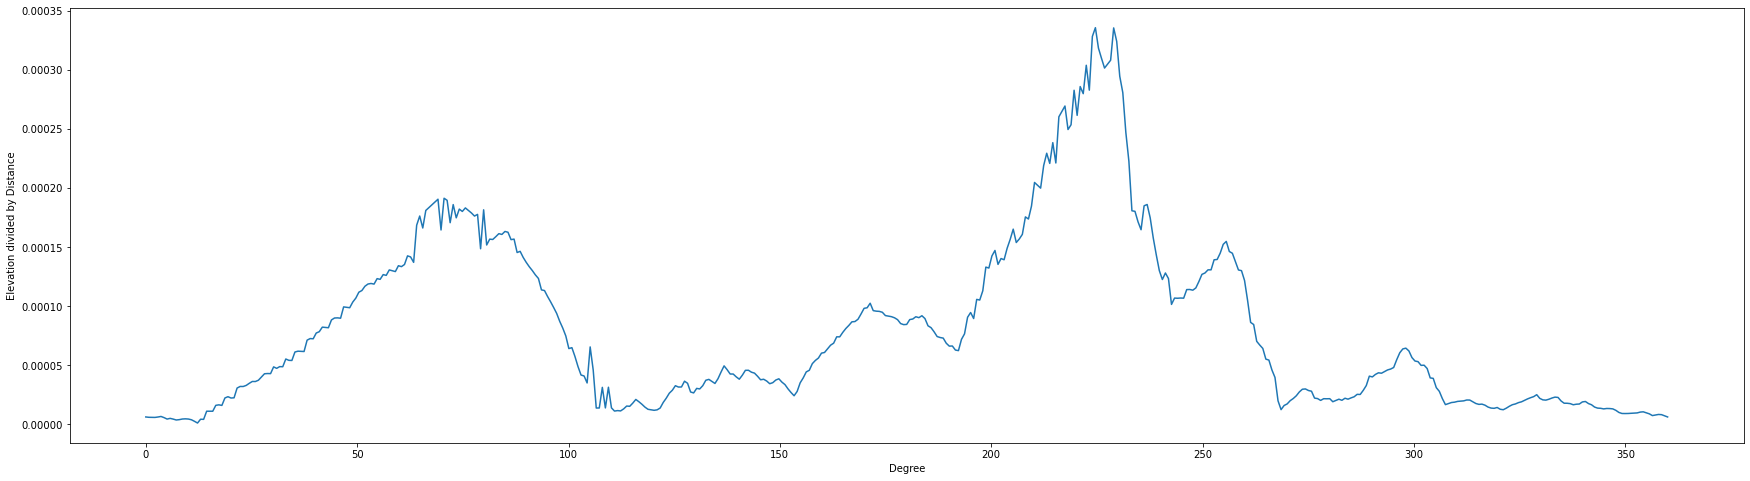

In [4]:
Plotting_Ridgline(image1_dist, 2.25)

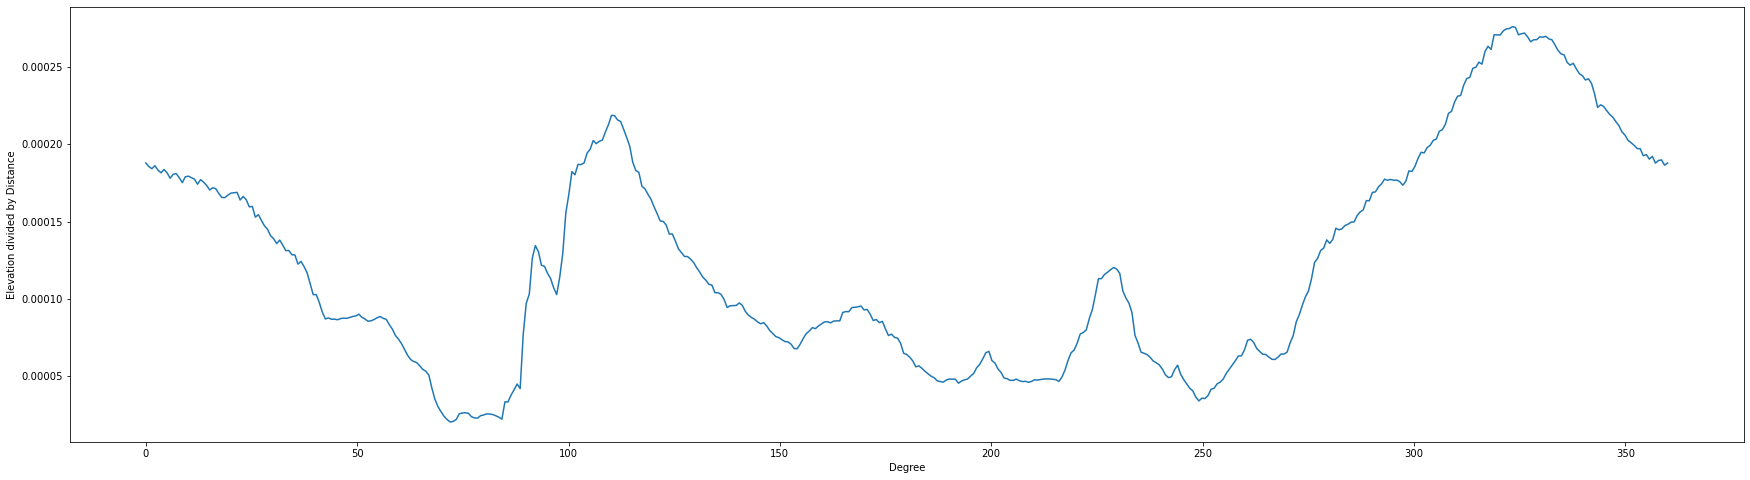

In [5]:
Plotting_Ridgline(image2_dist, 1.588427114)

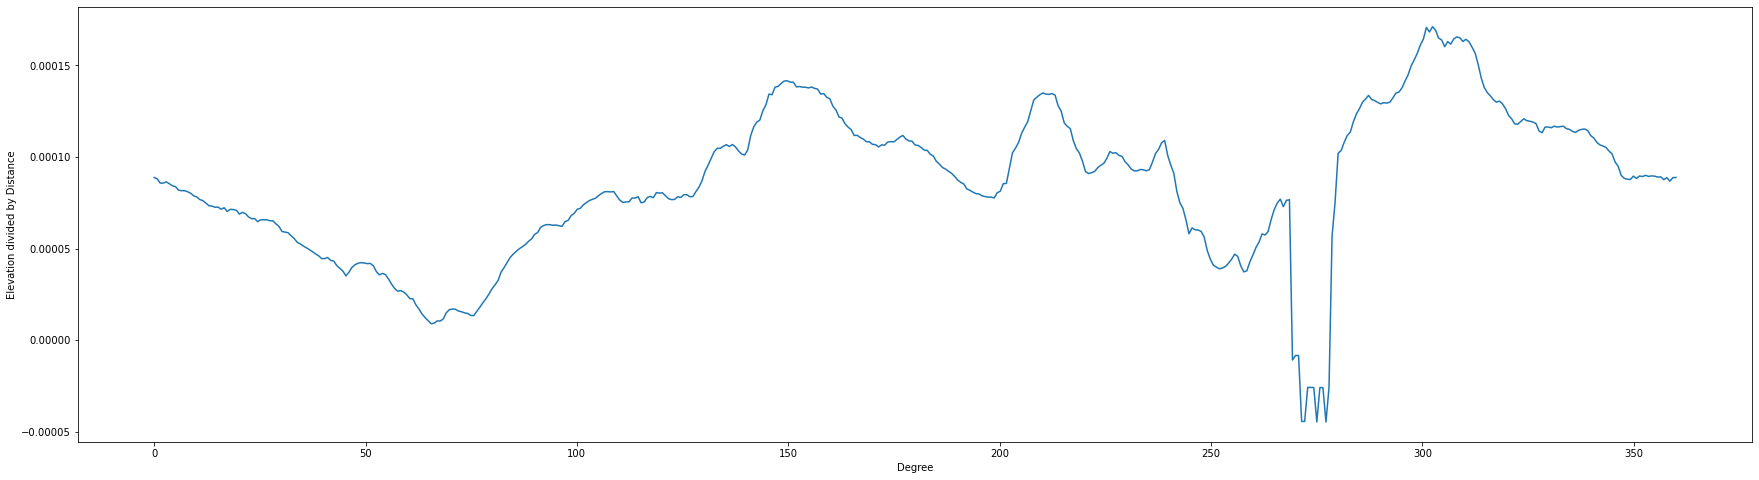

In [6]:
Plotting_Ridgline(image3_dist, 1.581527675)

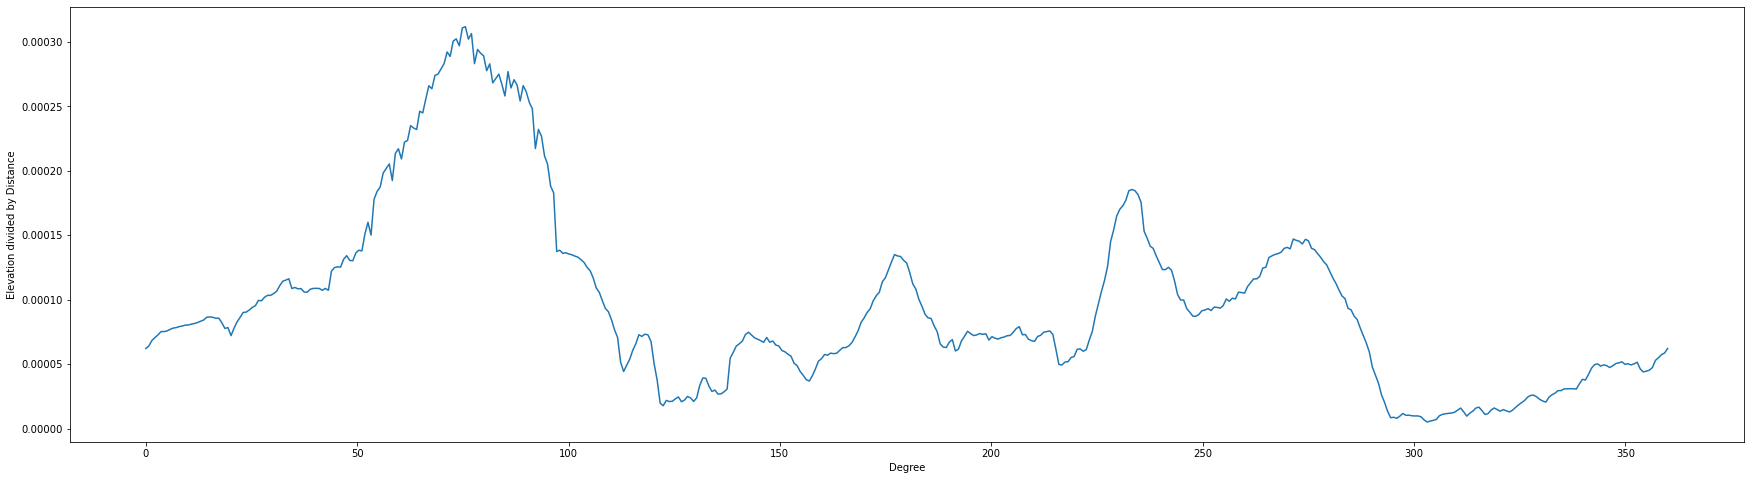

In [7]:
Plotting_Ridgline(image4_dist, 2.023487544)

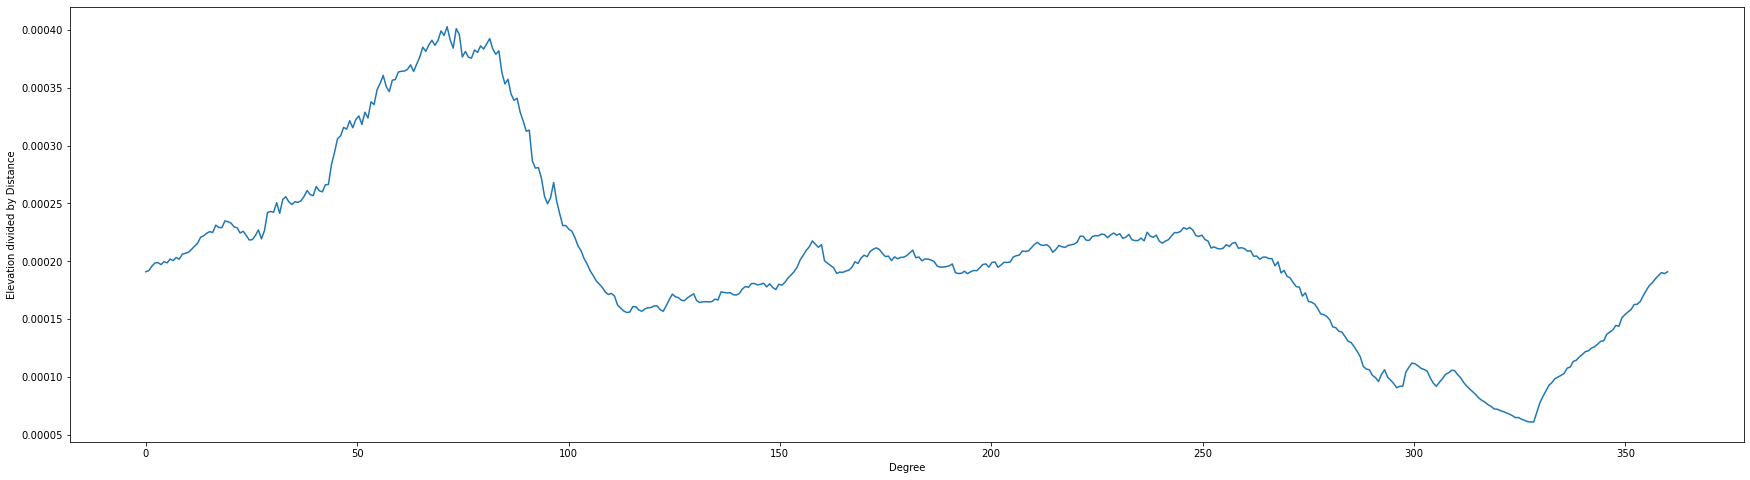

In [8]:
Plotting_Ridgline(image5_dist, 1.194870112)

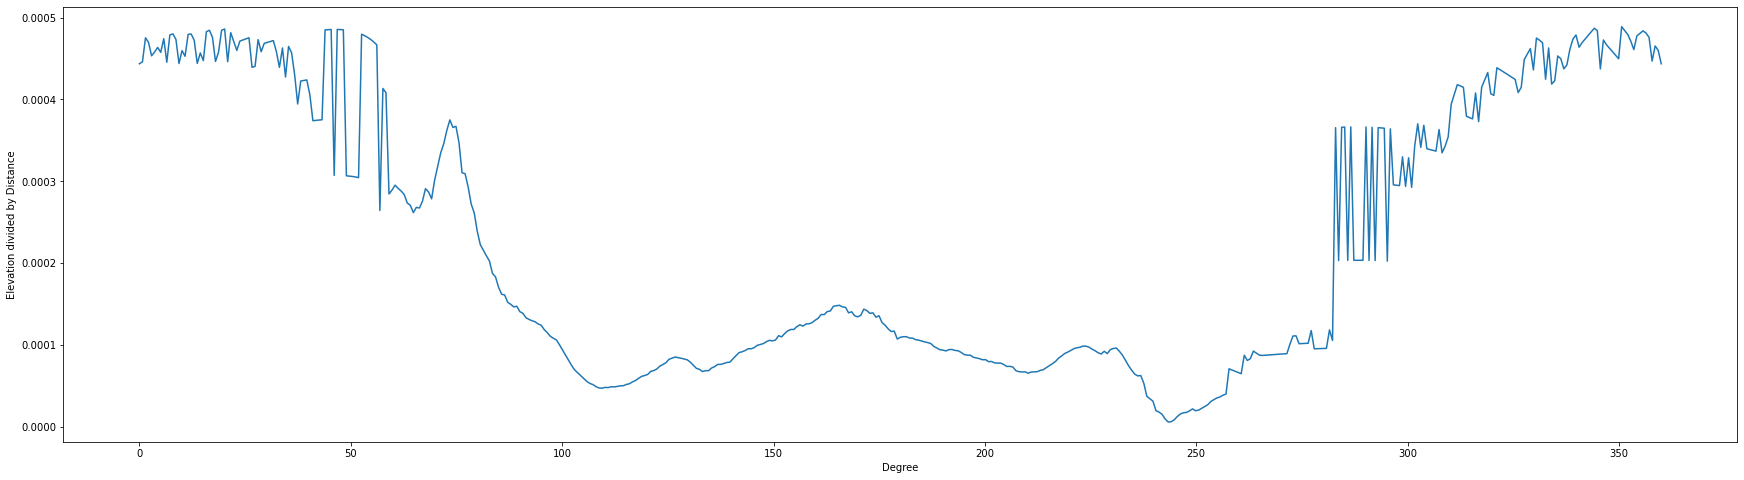

In [9]:
#this image looks a little off, but the rest seem plausible (should visaully confrim in Google Earth)
Plotting_Ridgline(image6_dist, 1.733286913)